In [1]:
# RandomWalk
# 14.3 LocationクラスとFieldクラス
#Figure 14.2
class Location(object):
    def __init__(self, x, y):
        """x と y は浮動小数点数""" 
        self.x, self.y = x, y

    def move(self, deltaX, deltaY):
        """deltaX と deltaY は浮動小数点数""" 
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        ox, oy = other.x, other.y
        xDist, yDist = self.x - ox, self.y - oy
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        # Location クラスの move メソッドを用いて，新しい位置情報を得る
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
        
#Figure 14.3
import random

class Drunk(object):
    def __init__(self, name = None):
        """name は文字列とする"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
        return random.choice(stepChoices)

#Figure 14.4
def walk(f, d, numSteps):
    """f：Field クラスのオブジェクト
       d：Drunk クラスのオブジェクト
       numSteps：0 以上の整数
       dをnumSteps回移動し，酔歩の初期位置と最終位置との差を出力する．""" 
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    """numSteps：0 以上の整数
       numTrials：正の整数
       dClass：Drunk のサブクラス
       numSteps 回移動する酔歩を，numTrials 回シミュレートする．
       各実験の初期位置と最終位置との差をリストにして出力する．"""
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """walkLengths：0 以上の整数のシークエンス
       numTrials：正の整数
       dClass：Drunk のサブクラス
       walkLengths の各要素を酔歩の移動回数として，numTrials 回の酔歩を
       シミュレートする simWalks を実行し，結果を出力する．""" 
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))


In [3]:
drunkTest((10,100,1000,10000),100,UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.986
 Max = 7.6 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 9.4
 Max = 23.0 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 29.152
 Max = 72.1 Min = 5.7
UsualDrunk random walk of 10000 steps
 Mean = 90.084
 Max = 208.5 Min = 8.6


In [6]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =[(0.0,1.0),(0.0,2.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

def simAll(drunkKinds, walkLenghts, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLenghts,numTrials,dClass)

In [8]:
simAll((UsualDrunk,ColdDrunk,EWDrunk),(100,1000),10)

UsualDrunk random walk of 100 steps
 Mean = 9.44
 Max = 24.2 Min = 2.8
UsualDrunk random walk of 1000 steps
 Mean = 33.87
 Max = 58.1 Min = 11.0
ColdDrunk random walk of 100 steps
 Mean = 81.44
 Max = 97.4 Min = 70.3
ColdDrunk random walk of 1000 steps
 Mean = 763.36
 Max = 800.3 Min = 722.7
EWDrunk random walk of 100 steps
 Mean = 14.4
 Max = 28.0 Min = 6.0
EWDrunk random walk of 1000 steps
 Mean = 30.6
 Max = 80.0 Min = 6.0


In [9]:
class styleIterator(object):
    def __init__(self,styles):
        self.index = 0
        self.styles = styles
    
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

Starting simulation of UsualDrunk
Starting simulation of 10 step
Starting simulation of 100 step
Starting simulation of 1000 step
Starting simulation of 10000 step
Starting simulation of 100000 step
Starting simulation of ColdDrunk
Starting simulation of 10 step
Starting simulation of 100 step
Starting simulation of 1000 step
Starting simulation of 10000 step
Starting simulation of 100000 step
Starting simulation of EWDrunk
Starting simulation of 10 step
Starting simulation of 100 step
Starting simulation of 1000 step
Starting simulation of 10000 step
Starting simulation of 100000 step


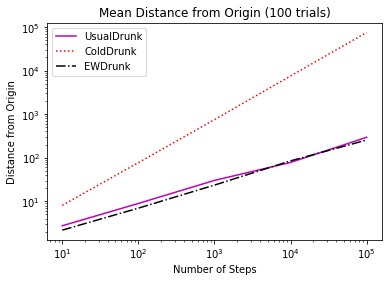

In [13]:
import pylab

def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'step')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll1(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-','r:','k-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass,walkLengths)
        pylab.plot(walkLengths, means,curStyle, label = dClass.__name__)
        pylab.title('Mean Distance from Origin (' + str(numTrials) + ' trials)')
        pylab.xlabel('Number of Steps')
        pylab.ylabel('Distance from Origin')
        pylab.legend(loc = 'best')
        pylab.semilogx()
        pylab.semilogy()

simAll1((UsualDrunk,ColdDrunk,EWDrunk),(10,100,1000,10000,100000),100)


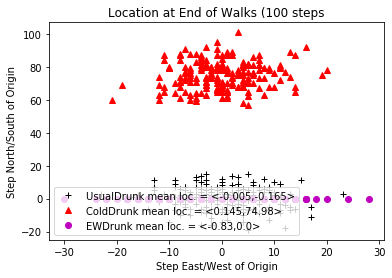

In [19]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs=[]
    d=dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d,Location(0,0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+','r^','mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps,numTrials,dClass)
        xVals, yVals = [],[]
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        meanX = sum(xVals)/len(xVals)
        meanY = sum(yVals)/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals,yVals,curStyle,label=dClass.__name__ + ' mean loc. = <' + str(meanX) + ',' + str(meanY) + '>')
    pylab.title('Location at End of Walks (' + str(numSteps) + ' steps')
    pylab.xlabel('Step East/West of Origin')
    pylab.ylabel('Step North/South of Origin')
    pylab.legend(loc = 'lower left')

plotLocs((UsualDrunk, ColdDrunk,EWDrunk),100,200)

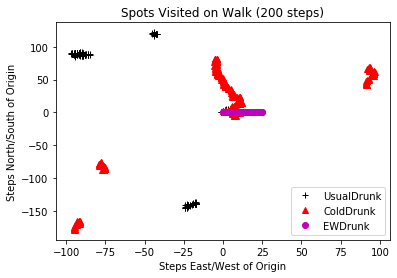

In [31]:
def traceWalk(drunkKinds, numSteps):
    styleChoice = styleIterator(('k+','r^','mo'))
    f = oddField(1000,100,200)
    # f = Field()
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0,0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [],[]
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals,yVals,curStyle,label = dClass.__name__)
        pylab.title('Spots Visited on Walk (' + str(numSteps) + ' steps)')
        pylab.xlabel('Steps East/West of Origin')
        pylab.ylabel('Steps North/South of Origin')
        pylab.legend(loc = 'best')
    
traceWalk((UsualDrunk,ColdDrunk,EWDrunk),200)

In [32]:
class oddField(Field):
    def __init__(self, numHoles, xRange, yRange):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x,y)] = newLoc
    
    def moveDrunk(self, drunk):
        Field.moveDrunk(self,drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x,y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x,y)]

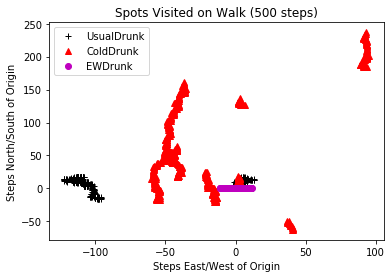

In [34]:
traceWalk((UsualDrunk, ColdDrunk, EWDrunk),500)